This is a highly interesting dataset with many problems to be solved; I attempted to tackle the problems using assumptions I made while writing the code.

This problem is divisible into three pieces. The feloow chart displays every completed task.
![Alt text](diagram1.png)

In [1581]:
import pandas as pd
import numpy as np
from matplotlib.dates import DateFormatter
import json
import matplotlib.pyplot as plt
import os, sys
import seaborn as sns
import random
from datetime import datetime, date
from scipy import stats
import plotly.graph_objects as pig

from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score
import plotly # if it is not install install it
from sklearn.utils import shuffle
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot
from sklearn.feature_selection import mutual_info_classif
from numpy import loadtxt
from imblearn.over_sampling import SMOTE


plt.style.use('seaborn') # ggplot
pd.options.display.precision = 2
pd.options.display.max_rows = 100
pd.options.display.max_columns = None ### watch out

width=800 # for all the figures the width and height size 
height=400
fig_hight,fig_width = 13.42,6 # for seaborn 
fig_size = (fig_hight, fig_width)


In [1582]:
#location of the file 
location = r'C:\Users\sasgaria\Desktop\challenge_data'  
dataset = pd.read_csv(location+'\covid_hospitalization_dataset.csv')

Overall description of all data to get a sense of the range and detect outliers and missing data

In [1583]:
dataset.describe()

,age,height,weight,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,motor,verbal,eye,wbc,rbc,hemoglobin,hematocrit,mcv,mch,mchc,rdw,platelet_count,pt,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation
count,701.00,297.00,388.00,694.00,693.00,677.00,679.00,691.00,688.00,557.00,557.00,557.00,679.00,677.00,678.00,677.00,678.00,675.00,675.00,674.00,670.00,408.00,493.00,412.00,659.00,674.00,674.00,484.00,440.00,701.00,169.00,107.00,309.00,81.00
mean,66.46,166.93,80.10,130.06,75.20,95.77,24.00,93.18,37.61,5.83,4.69,3.89,7.85,4.72,129.49,0.39,86.35,28.58,330.49,14.09,222.83,14.53,48.17,61.13,115.37,135.75,3.93,10.59,2.28,14.74,15.54,3.70,5.53,5.99
std,17.34,10.80,21.38,22.55,13.27,18.59,7.15,6.93,1.08,0.76,0.90,0.51,3.75,4.08,18.85,0.05,7.44,2.88,13.18,2.00,92.95,5.23,47.82,77.80,97.40,5.51,0.54,9.15,1.32,28.09,19.54,5.28,12.39,9.74
min,18.00,125.00,27.70,74.00,22.00,41.00,12.00,3.00,26.80,1.00,1.00,1.00,0.20,1.65,49.00,0.16,56.70,17.30,272.00,1.20,19.00,11.00,5.00,11.00,30.00,111.00,2.10,3.00,0.60,1.00,1.00,0.00,0.00,0.00
25%,56.00,159.00,65.80,115.00,67.00,83.00,20.00,92.00,36.80,6.00,5.00,4.00,5.35,4.11,119.00,0.36,83.03,27.40,321.00,12.90,160.25,12.80,24.00,32.75,75.50,133.00,3.60,6.00,1.50,5.00,5.00,1.00,0.00,1.00
50%,68.00,167.60,76.30,128.00,75.00,96.00,22.00,95.00,37.50,6.00,5.00,4.00,7.00,4.56,131.00,0.40,87.00,28.90,332.00,13.70,205.50,13.40,37.00,47.00,93.00,136.00,3.90,9.00,2.00,9.00,10.00,2.00,0.00,3.00
75%,80.00,175.00,89.83,144.00,83.00,107.00,28.00,96.00,38.40,6.00,5.00,4.00,9.45,5.01,142.00,0.43,90.80,30.40,340.00,14.90,266.75,14.40,56.00,68.00,121.50,138.00,4.20,12.00,2.60,15.00,17.00,4.00,6.00,7.00
max,100.00,198.00,199.60,230.00,145.00,199.00,59.00,100.00,40.50,6.00,5.00,4.00,33.40,109.00,180.00,0.55,114.30,40.60,382.00,25.90,671.00,72.60,586.00,1307.00,1179.00,180.00,6.30,166.00,13.80,494.00,128.00,28.00,124.00,60.00


# Understanding the data

First of all to have a better idea of what each feature means, all features explained.

systolic_blood_pressure: measures the pressure in your arteries when your heart beats

diastolic_blood_pressure: measures the pressure in  arteries

heart_rate: heart rate

respiratory_rate: number of breaths you take per minute.

oxygen_saturation: how much hemoglobin is currently bound to oxygen compared to how much hemoglobin remains unbound

temperature: temperature

wbc, rbc: blodd

hemoglobin: part of your red blood cell

hematocrit: percentage of red blood cells in blood

mcv, mch:, mchc: Mean corpuscular volume, mean corpuscular hemoglobin, average amount of hemoglobin in a group of red blood cells

rdw	platelet_count:	

pt:	 test to evaluate blood clotting

alt: Alanine transaminas

ast: enzyme 







# Feature Extraction 

From the first view of this dataset, many of the features have a lot of missing values. However, we can extract valuable features by combining several features of this dataset. Hence, in the first step, useful features that can be extracted from several features have been identified. For instance, it is essential to know if the person went to ICU or WARD the first or second, or even the third time when they were in the hospital. For instance, the person went to WARD first, then to the ICU, and finally, to WARD again. 

The first two features that got extracted is named ICU and WARD. Thease features can get three value 1, 2 , 3, 4. My assumption is that the person can go to ICU and WARD as many times as it can. Hence, if the value of that faeture is equal to 0 it means that the person's Admission disposition was first that. For example if the person's Admission disposition is ICU, the ICU of that row will be zero.  If the value of that faeture is equal to 1, it means that the person went to the other room after the first room. Similarly if the value is 3 it means that the person changed the room of it again for the third time. In some of the raws the person went to ICU then WARD tehn ICU then WARD, so in these specific rows I assumed that  WARD is 4 and ICU is 3. But we can also consider the possibility that thease rows are noisy.


The flowchart of these two extracted feature is clearly explained in the Figure below.
![Alt text](Untitled%20Diagram-Page-3%20(3).png)

In [1584]:
def  create_icu_ward_feature(df):

  # initial value to 0 - assumed that if there are not any features 
  df['ICU'] = [0] * len(df)
  df['WARD'] = [0] * len(df)
  # create feature of lenght between amount days the person stay in hospital and amount of stay in ICU
  df['hospital_icu'] = df['hospital_length_of_stay'] - df['icu_length_of_stay']
  # create feature of diffirence of amount above and days_in_hospital_prior_to_icu_admission
  df['hospital_icu_prior'] = df['hospital_icu'] - df['days_in_hospital_prior_to_icu_admission']

  for counter in range(len(df)):
    
    if df.loc[counter,'admission_disposition']== 'ICU':
      # first the person were in a ICU
      df.loc[counter, 'ICU'] = 1

      # cheack if the person after ICU went to WARD and from WARD to ICU
      if  df.loc[counter, 'days_in_hospital_prior_to_icu_admission'] > 0:
         # The person went 
         df.loc[counter,'ICU'] = 3
         df.loc[counter,'WARD'] = 2

         if  df.loc[counter,'hospital_icu_prior'] > 0:

             df.loc[counter,'WARD'] = 4
          
     #if  days_in_hospital_prior_to_icu_admission is null or zero 
      else:

         if  df.loc[counter,'hospital_icu'] > 0:
         #ICU will be one
             df.loc[counter,'WARD']= 2 


    # if the person were WARD first
    if  df.loc[counter,'admission_disposition'] == 'WARD':

       df.loc[counter,'WARD'] = 1
      # cheack if the person after ICU went to WARD and from WARD to ICU
       if  df.loc[counter,'days_in_hospital_prior_to_icu_admission'] >= 0:

         df.loc[counter,'ICU'] = 2
 
       if   df.loc[counter,'hospital_icu_prior'] > 0:

          df.loc[counter,'WARD'] = 3

  return df        

There are two feature days_in_hospital_prior_to_mechanical_ventilation and time_on_mechanical_ventilation feature , they can tell us if the person were intubated in hospital. In this code it is assumed that if both of the expected features are null the person did not get intubated.


In [1585]:
# cheack and correct intubated feature

def complete_intubated(df):
  # initial value is nan
  df['intubated_hospital'] = [np.nan] * len(df)
  # if the person intubated during the hospital, if each of them is bigger than 0 then the value is one (the person intubated in hospital), if not is 0 
  df['intubated_hospital'] =  np.where((df['time_on_mechanical_ventilation'] > 0) | (df['days_in_hospital_prior_to_mechanical_ventilation']>0), 1, 0)

  return df      

In [1586]:
#call the functions that are created
dataset = create_icu_ward_feature(dataset)
dataset = complete_intubated(dataset)

As indicated in the Readme file, features such as days in hospital prior to death, icu length of stay, days in hospital prior to icu admission, time on mechanical ventilation, and days in hospital prior to mechanical ventilation are all null if their respective conditions do not occur. For instance, days in hospital prior to mechanical ventilation is null if the patient is not intubated. Consequently, they differ from missing values. In addition, if any of the preceding features is null, the value will be converted to zero.

In [1587]:
def convert_to_zero(df,feature):
   return     np.where(pd.notna(df[feature]), df[feature], 0)


features_to_convert =['time_on_mechanical_ventilation', 'days_in_hospital_prior_to_mechanical_ventilation','icu_length_of_stay', 'days_in_hospital_prior_to_icu_admission']
# for each of the features convert to zero if it is null
for feature in features_to_convert:
    # if it has a value do not change the value
    dataset[feature] = convert_to_zero(dataset,feature)

It can be important for us to add a feature that shows the paient in the ICU compare to all of its time in the hospital. Hence this feature can be as follows:

In [1588]:
dataset['icu_hospital'] = dataset['icu_length_of_stay'].div(dataset['hospital_length_of_stay'])
dataset['mech_hospital'] = dataset['time_on_mechanical_ventilation'].div(dataset['hospital_length_of_stay'])


for feature in ['icu_hospital', 'mech_hospital', 'hospital_icu_prior', 'hospital_icu']:
    dataset[feature] = convert_to_zero(dataset,feature)
 

We have two features named diastolic blood pressure and systolic blood pressure for the Blood pressure. However, each of these characteristics may be condensed into a single category feature that is far more valuable for our machine learning model. Blood pressure may be separated into four categories. Stage 1 is Normal, Stage 2 is High, and Stages 3 and 4 are Dangerous.

According to published research, if the blood pressure is in stages 3 or 4, hypertension is likely .

In [1589]:
def categorical_features_blood(df):
    # initial values are nan
  df['blodd_pre'] = [np.nan] * len(df)

  for counter in range(len(df)):

      if df.loc[counter,'systolic_blood_pressure'] < 120 and df.loc[counter,'diastolic_blood_pressure'] <= 80:

          df.loc[counter,'blodd_pre'] = 1
          #if it is one do not check others
          continue

      if (df.loc[counter,'systolic_blood_pressure']  >= 120 and df.loc[counter,'systolic_blood_pressure']<= 129) or df.loc[counter,'diastolic_blood_pressure'] <=80: 

          df.loc[counter,'blodd_pre'] = 2
          continue

      if (df.loc[counter,'systolic_blood_pressure'] >= 130 and df.loc[counter,'systolic_blood_pressure'] <= 139)  or (df.loc[counter,'diastolic_blood_pressure'] >= 80 and  df.loc[counter,'diastolic_blood_pressure'] <= 89)  :
         
          df.loc[counter,'blodd_pre'] = 3
          continue
  
      if df.loc[counter,'systolic_blood_pressure']  >= 140 or df.loc[counter,'diastolic_blood_pressure']  >= 90:

          df.loc[counter,'blodd_pre']=  4   
          continue
      # cheak if it is not in this range, there are just nan values which are already initialized.
  
  #df = df.drop(['systolic_blood_pressure', 'diastolic_blood_pressure'], axis =1)
  return df
dataset = categorical_features_blood(dataset)  

Before proceeding to the next sections, the visualisation functions used in this code are listed below. Plotly and Seaborn have been used to visualise this code.

In [1590]:
import plotly.express as px


def plot_pie_chart(df, coloumn1, column2):
    # pie chart
    # convert dict to dataframe 
    fig = px.pie(df, 
                 values= column2, 
                 names=coloumn1,
                 title='Percentage of the people' + column2  
                 ) #  
    fig.show()


def histogram(df, feature):
  # histogram chart
  fig = px.histogram(df, x = feature,
                     width = width,
                     height = height
                     )
  fig.show()


def count_histogeram_two_py(df, feature1, feature2):
  # histogram with two feature -- this is a good vuisualization to compare two feature
  fig = px.histogram(dataset, x = feature1, color = feature2, 
                     barmode='group',                     
                     width = width,
                     height = height
                    ) 
  fig.show()


def count_histogeram_two_sns(dataset, feature1, feature2):
  # histogram with two feature using seaborn
  fig, ax = plt.subplots(figsize=(13.42,6))
  sns.countplot(x=feature1, hue=feature2,
                data=dataset,ax=ax
               )  
  fig.show()


def boxplot(df, feature):
    # box plot for plotly -- it is good for detecting outliers
    fig = px.box(df, y=feature,
                 width = width, 
                 height = height
                )
    fig.show()


def several_histogram(df, feature1_cat, feature2_cat):
  # several histogram between categorical features  
   fig = px.histogram(df, x=feature2_cat, 
                     color=feature1_cat,
                     width = width, height = height
                     )          
   fig.show()


def bar_plot(df, f1, f2, f3):
  #bar plot plotly
  fig, ax = plt.subplots(figsize=(13.42,6))
  sns.barplot(data = df, x=f1,
              y=f2, hue=f3
              )


def corrolation_map(df):
  # Heatmap or corrolation map to detect corrolation between two features
  fig, ax = plt.subplots(figsize=(40,40))
  heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
  heatmap.set_title('Correlation Heatmap', 
                   fontdict={'fontsize':12}, pad=12
                   )
  fig.show()

def seaborn_bar_plot(df, column1, column2):
     # it is better if the input data is sorted to have a abetter visualization.
     fig, ax = plt.subplots(figsize=(30.42,12))
     sns.barplot(x=column1,
                 y=column2, data=df,
                )
     fig.show()          





This section examines comorbidities prior to acquiring representations of the created characteristics.

In this section, Hashmap is used as the data structure since all people with the given ailment must be stored. This is because we will be searching for information on each ailment in following sections, and the search order in Hashmap is O (1).

There are two Hashmaps in use, termed ''comorb hashmap list user' and 'comorb hashmap' count each. 'comorb hashmap list user' is a hashmap whose items are all lists. This list includes all patients with the same ailment. For example

['Diabets'] -> [5,7,8,10] — Patients 5, 7, 8, and 10 are diabetic.

Additionally, 'comorb hashmap count each' only stores the number of patients with this illness.

This function is used twice, first for individuals who have died and again for those who have recovered.

As can be seen, numerous issues are categorised as "other;" but, because "other" may change between diseases and is not specific, it was disregarded.
Furthermore, since a user may enter an illness twice for the same patient, the unique feature is employed.

In [1591]:
#preprocess the text since user may use Upper or Lower case when entering in a dataset
def simple_preprocess_text(text):
    
            text = text.lower()
            text = text.replace(" ", "_")
            text = text.replace("[", "(")
            text = text.replace("]", ")")
            return text

In [1592]:
def comorb_disease(df, target_label,dead_flag):
  '''
    Parameters
    ----------
    df : DataFrAME
        copy of the dataset.
    target_label : Series 
       target ourput
    dead_flag : flag, boolean
       if flag =='Yes': only died people
          flag == 'No': recovered people

    Returns updated dataset

  '''

  # Using hashmap for a efficient data structure, each raw of this hashmap is the list of all patients that have this disease
  comorb_hashmap_list_user = {} 
  comorb_hashmap_count_each = {}
  
  for counter, disiease_list in enumerate(df['comorbidities'].apply(eval)): 
    # If it is not a missing value and the person is dead/ recovered upon to the function
      if disiease_list and  target_label[counter] == dead_flag:
        # Unique is used since the user may wrongly put the same disease twice for one patient
          for disiease in np.unique(disiease_list): 
            if disiease != 'Other':
              # Preporcess the text data
              disiease = simple_preprocess_text(disiease)
              # Adding each patient disease to the hashmap  
              if disiease not in comorb_hashmap_list_user:

                comorb_hashmap_list_user[disiease] = []
                comorb_hashmap_list_user[disiease].append(counter)
                comorb_hashmap_count_each[disiease] = 1

              else:

                comorb_hashmap_list_user[disiease].append(counter)
                comorb_hashmap_count_each[disiease] += 1

  # sort the hashmap by its value for the chart 
  return dict(sorted(comorb_hashmap_count_each.items(), key=lambda item: item[1])), comorb_hashmap_list_user

           
# We can do both processes in the above function and just call the function once; however, this format is more readable for others to understand.          
disease_dead_dict_count, disease_dead_dict_user_list = comorb_disease(dataset, dataset['did_the_patient_die_in_hospital'],'Yes')
plot_pie_chart(pd.DataFrame(disease_dead_dict_count.items(),
                            columns=['Disease', ' dead']),'Disease' ,' dead')

disease_recovered_dict_count, disease_recovered_dict_user_list = comorb_disease(dataset, dataset['did_the_patient_die_in_hospital'],'No')
plot_pie_chart(pd.DataFrame(disease_recovered_dict_count.items(),
                            columns=['Disease', ' recovered']), 'Disease' ,' recovered')


Bounes task:

The preceding figure reveals that 29.6% of persons who have died had hypertension in the past. The subsequent 17 percent of deceased individuals had diabetes. However, we cannot declare that these two diseases were the most dangerous because huge percentages of patients with the same condition survived. Therefore, in order to determine the most dangerous sickness, we must calculate the proportion of individuals who died from each disease relative to the total number of people who had it.

As explained in the previous section, since hashmap is employed as the data structure and we know which patients had each disease, this step will be straightforward.


In [1593]:
def most_dangerous_desease(dead_dict,recovered_dict):
    
    min_number = 0
    max_disease = ' '
    all_hash_patients = {}

    for key in dead_dict:
      # percentage of each disease number of people died devide by all of the people that had the disese
      percentage_disease =   (dead_dict[key]) / (recovered_dict[key] + dead_dict[key]) * 100
      print('Disease: ', key, int(percentage_disease), '%', 'of people that had this disease have been died')
      # since the name of disease are long the first 12 char will be saved, however, we can also map each disease to smaller name
      all_hash_patients[str(key)[:12]] = percentage_disease
      #save rhe most danger one
      if percentage_disease > min_number:

        min_number = percentage_disease
        max_disease = key

    return  max_disease, all_hash_patients

dangerous_disease_name, all_hash_patients = most_dangerous_desease(disease_dead_dict_count, disease_recovered_dict_count)
print('Most Dangerous disease is:', dangerous_disease_name)

Disease:  rheumatologic_disorder 13 % of people that had this disease have been died
Disease:  kidney_disease 16 % of people that had this disease have been died
Disease:  hematological 20 % of people that had this disease have been died
Disease:  obesity 13 % of people that had this disease have been died
Disease:  asthma 10 % of people that had this disease have been died
Disease:  chronic_neurological_disorder 36 % of people that had this disease have been died
Disease:  cancer_(active_only) 34 % of people that had this disease have been died
Disease:  history_of_cancer_(now_in_remission) 30 % of people that had this disease have been died
Disease:  stroke 33 % of people that had this disease have been died
Disease:  chronic_pulmonary_(lung)_disease 27 % of people that had this disease have been died
Disease:  chronic_renal 35 % of people that had this disease have been died
Disease:  dementia_(any_etiology) 33 % of people that had this disease have been died
Disease:  chronic_cardi

<ipython-input-1590-c79b65bbc66b>:84: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



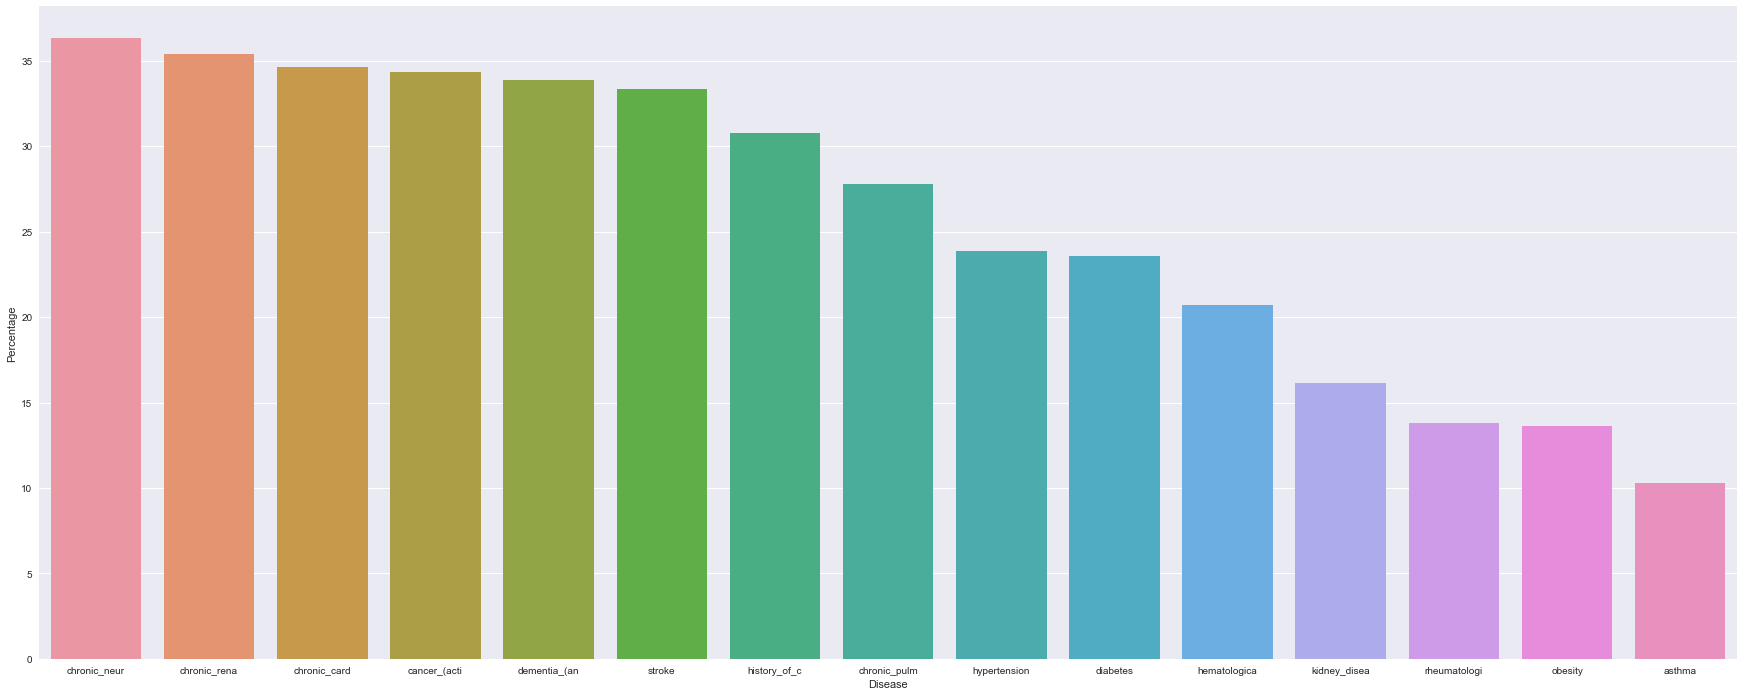

In [1594]:

disease_dataframe = pd.DataFrame(all_hash_patients.items(),
                                     columns=['Disease', 'Percentage'])

seaborn_bar_plot(disease_dataframe.sort_values('Percentage',ascending = False), 'Disease','Percentage')


Clearly, the chronic neurological disorder is the most dangerous of all diseases. Despite the fact that this disease is quite uncommon compared to others, it is considered the most dangerous. In addition, a combination of two of these disorders might be advantageous, that can be furthere explored.

Now each disease will be a distinguishing feature for patients.

In [1595]:
def make_desease_features(df, dead_list, recovered_list):
    list_disease_features = []
     # make a column for each disease in the dataframe, there were no disease that was not in recovered 
    for disease in recovered_list.keys():
      #initial value
      df[disease] = [0] * len(df)

      for pationt in recovered_list[disease]:

        df.loc[pationt,disease] = 1
      #all the disease are not result in death like peregnency
      if disease in dead_list:

        for pationt in dead_list[disease]:

           df.loc[pationt,disease] = 1

      df[disease] = df[disease].astype("object")

    return df 
#making feature column for each disease in our dataset
dataset = make_desease_features(dataset, disease_dead_dict_user_list, disease_recovered_dict_user_list)  
# since all of the disease are feature, this feature is drop
dataset = dataset.drop('comorbidities',axis=1) 

In [1596]:
dataset

,age,sex,height,weight,smoking_history,previous_er_visit_within_14_days,admission_disposition,systolic_blood_pressure,diastolic_blood_pressure,heart_rate,respiratory_rate,oxygen_saturation,temperature,motor,verbal,eye,intubated,wbc,rbc,hemoglobin,hematocrit,mcv,mch,mchc,rdw,platelet_count,pt,alt,ast,serum_creatinine,sodium,potassium,total_serum_bilirubin,lactate,did_the_patient_die_in_hospital,hospital_length_of_stay,icu_length_of_stay,days_in_hospital_prior_to_icu_admission,time_on_mechanical_ventilation,days_in_hospital_prior_to_mechanical_ventilation,ICU,WARD,hospital_icu,hospital_icu_prior,intubated_hospital,icu_hospital,mech_hospital,blodd_pre,hypertension,chronic_cardiac_disease_(not_hypertension),chronic_pulmonary_(lung)_disease,diabetes,kidney_disease,dementia_(any_etiology),stroke,history_of_cancer_(now_in_remission),chronic_renal,obesity,asthma,rheumatologic_disorder,cancer_(active_only),pregnancy,liver_disease,hematological,chronic_neurological_disorder
0,74,Male,NaN,NaN,NaN,No,WARD,99.0,62.0,85.0,20.0,93.0,37.5,6.0,4.0,4.0,No,11.0,5.63,132.0,0.41,72.1,23.4,325.0,18.5,128.0,14.1,53.0,49.0,165.0,135.0,3.9,10.0,2.3,Yes,21,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,61,Female,154.9,73.6,NaN,No,WARD,122.0,77.0,93.0,36.0,88.0,38.0,6.0,5.0,4.0,No,5.0,4.49,121.0,0.35,78.6,26.9,343.0,14.2,236.0,12.9,68.0,68.0,49.0,137.0,3.8,12.0,1.5,No,5,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0,0.0,0.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,58,Female,NaN,NaN,NaN,No,WARD,109.0,72.0,73.0,24.0,91.0,38.3,6.0,5.0,3.0,No,6.2,4.31,119.0,0.36,84.0,27.6,329.0,12.5,249.0,NaN,52.0,76.0,71.0,135.0,3.7,7.0,1.0,No,7,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,94,Male,182.8,66.2,NaN,No,WARD,165.0,71.0,92.0,16.0,96.0,37.5,6.0,5.0,4.0,No,5.2,4.18,137.0,0.43,102.4,32.8,320.0,17.2,98.0,NaN,6.0,24.0,146.0,135.0,2.8,10.0,4.5,Yes,9,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0,0.0,0.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,91,Male,NaN,NaN,Ex-smoker,No,WARD,131.0,76.0,60.0,18.0,95.0,38.2,6.0,5.0,4.0,No,4.4,4.65,127.0,0.41,88.4,27.3,309.0,17.6,74.0,NaN,17.0,26.0,109.0,142.0,3.8,19.0,3.2,Yes,9,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0,0.0,0.0,2.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,32,Female,NaN,NaN,Non-smoker,No,WARD,101.0,83.0,NaN,18.0,97.0,39.0,NaN,NaN,NaN,No,15.3,4.04,122.0,0.37,91.5,30.3,331.0,13.4,175.0,NaN,NaN,NaN,186.0,140.0,3.8,166.0,NaN,No,7,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0,0.0,0.0,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
697,65,Male,NaN,NaN,Non-smoker,No,WARD,104.0,51.0,82.0,20.0,94.0,35.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,127.0,4.7,NaN,NaN,No,8,0.0,0.0,0.0,0.0,0,1,0.0,0.0,0,0.0,0.0,1.0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
698,60,Male,NaN,NaN,Non-smoker,No,ICU,150.0,70.0,92.0,22.0,95.0,38.5,NaN,NaN,NaN,No,6.4,4.85,142.0,0.42,87.5,29.3,335.0,13.0,377.0,13.5,NaN,NaN,71.0,137.0,4.0,NaN,NaN,No,2,0.0,0.0,0.0,0.0,1,0,0.0,0.0,0,0.0,0.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
699,63,Male,NaN,NaN,Non-smoker,No,ICU,157.0,102.0,96.0,NaN,99.0,NaN,5.0,1.0,2.0,No,11.5,4.40,146.0,0.43,98.3,33.3,339.0,13.8,232.0,NaN,NaN,NaN,NaN,139.0,5.2,NaN,NaN,No,61,61.0,0.0,0.0,0.0,1,0,0.0,0.0,0,1.0,0.0,4.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


Since we will frequently employ continuous and categorical features, as well as for feature selection in the section following, there are two update functions.

In [1597]:
# initial value for continues_col
continues_features = ['age', 'height','weight','heart_rate', 'respiratory_rate',
       'oxygen_saturation', 'temperature', 'wbc', 'rbc', 'hemoglobin', 'hematocrit', 'mcv', 'mch',
       'mchc', 'rdw', 'platelet_count', 'pt', 'alt', 'ast', 'serum_creatinine',
       'sodium', 'potassium', 'total_serum_bilirubin', 'lactate','hospital_icu','hospital_icu_prior', 'intubated_hospital', 'icu_hospital',
       'mech_hospital']

       
categorical_features = ['sex', 'smoking_history', 'previous_er_visit_within_14_days', 'motor', 
       'verbal', 'eye', 'intubated','ICU','WARD','blodd_pre', 'hypertension',
       'chronic_cardiac_disease_(not_hypertension)',
       'chronic_pulmonary_(lung)_disease', 'diabetes', 'kidney_disease',
       'dementia_(any_etiology)', 'stroke',
       'history_of_cancer_(now_in_remission)', 'chronic_renal', 'obesity',
       'asthma', 'rheumatologic_disorder', 'cancer_(active_only)', 'pregnancy',
       'liver_disease', 'hematological', 'chronic_neurological_disorder']




# each time we want to remove a feature from categorical_features
def update_categorical_features(categorical_features, removedfeature):

    return list(set(categorical_features).difference(removedfeature))


  
# each time we want to remove a feature from continues_col
def update_continues_features(continues_col, removedfeature):
   return list(set(continues_col).difference(removedfeature))

  


# Visualization

In this section to have a better overview of diffirent features, they have visualized using diffirent libraries such as Plotly and Seaborn

In [762]:
#First of all lets see how is the labels of the data 

In [1598]:
histogram(dataset, dataset.did_the_patient_die_in_hospital)

As can be seen from the table above, this data is completely unbalanced. Consequently, these kind of datasets necessitate feature engineering and machine learning models with (down or up dampeling technique or data augmentation)

c:\Users\sasgaria\Anaconda31\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='height', ylabel='Density'>

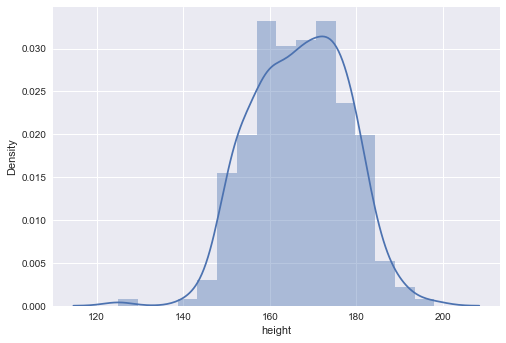

In [1599]:
sns.distplot(dataset.height)

A bar graph of all continuous features can give us an understanding of outliers and their impact.

In [722]:
plt.figure(figsize=(15,60))
for i,column in enumerate(continues_features):
    if column not in ['icu_hospital','mech_hospital']:
        boxplot(dataset, column )


<Figure size 1080x4320 with 0 Axes>

In [723]:
several_histogram(dataset, 'sex', 'age' )

Percentage of individuals with chronic neurological disease by sex, it seems that Female's get this disease more than Male's 

In [724]:
plot_pie_chart(dataset[dataset['chronic_neurological_disorder']==1], 'sex', 'chronic_neurological_disorder' )

Female's are more likely to be admitted to the ICU.

In [727]:
plot_pie_chart(dataset, 'sex', 'ICU' )

In [728]:
histogram(dataset, 'diastolic_blood_pressure')

<ipython-input-705-7142d139c4a1>:40: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



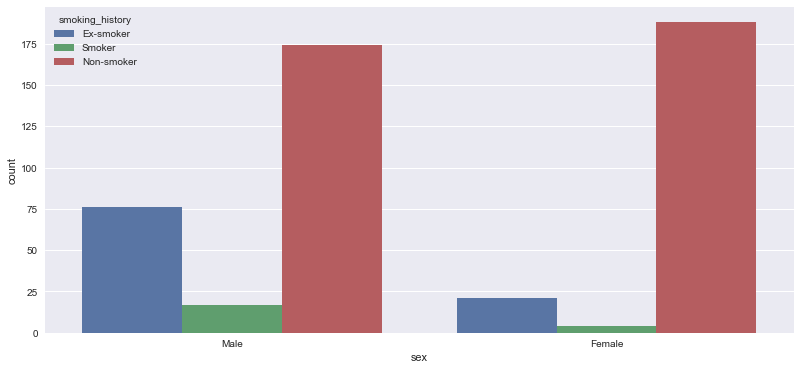

In [732]:
count_histogeram_two_py(dataset, 'intubated','did_the_patient_die_in_hospital')
count_histogeram_two_py(dataset,'sex','did_the_patient_die_in_hospital')
count_histogeram_two_sns(dataset,'sex','smoking_history')

<ipython-input-705-7142d139c4a1>:40: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



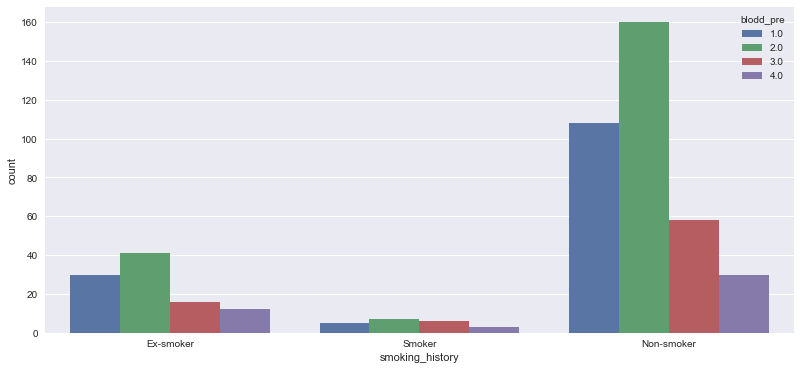

In [733]:
count_histogeram_two_sns(dataset,'smoking_history','blodd_pre')

In [738]:
# Monitoring each feature with the target variable.
for feature in dataset.select_dtypes(include='object').columns:
  count_histogeram_two_py(dataset,feature,'did_the_patient_die_in_hospital')

This section displays each feature's disturbance with the target term disturbance.

In [739]:

for feature in dataset.select_dtypes(include='float').columns:
  count_histogeram_two_py(dataset,feature,'did_the_patient_die_in_hospital')

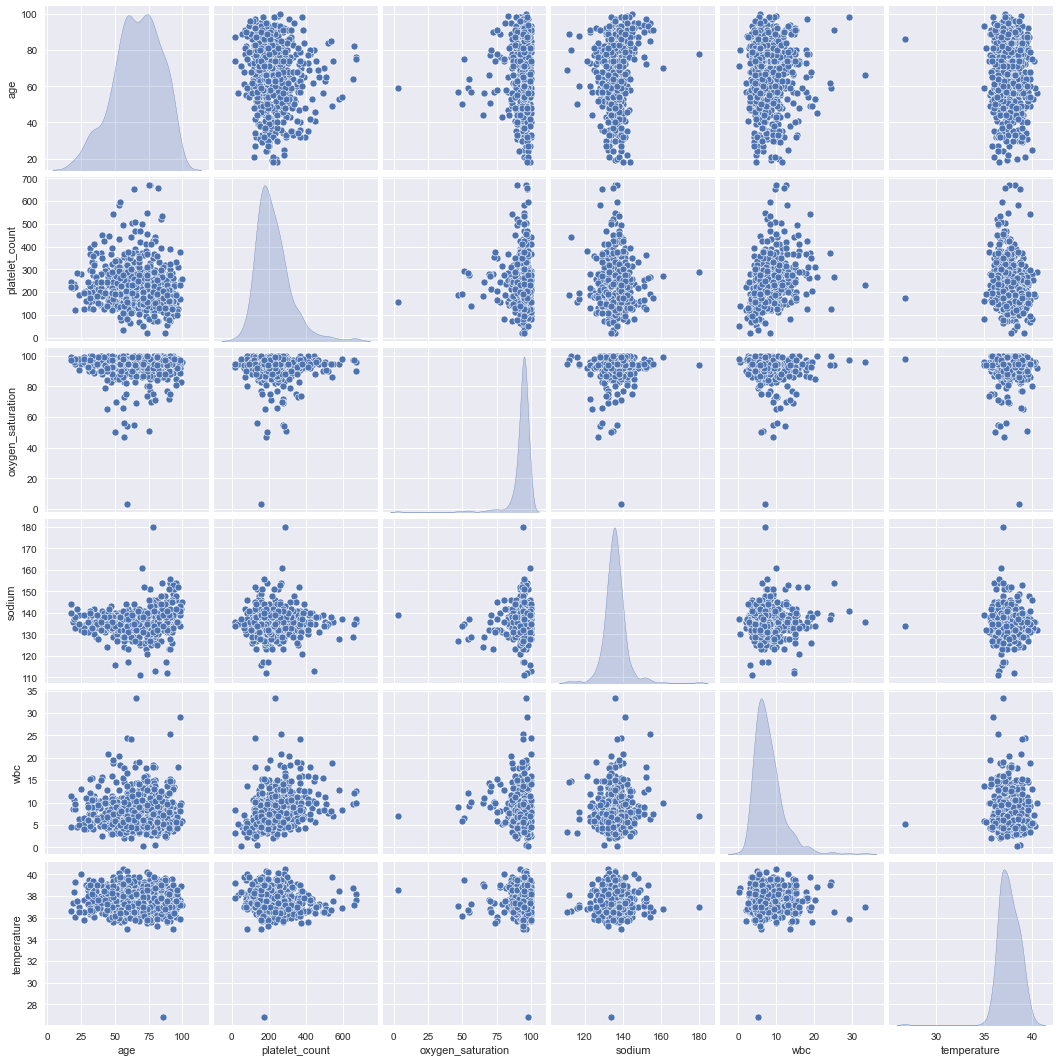

In [740]:
sns.pairplot(dataset[['age', 'platelet_count', 'sex', 'oxygen_saturation','sodium','wbc','temperature']], diag_kind='kde')

# Feature Engineering 

First, since we have already extracted useful features from the dataset, we do not need some of the previous features, so they should be removed before proceeding.

In [1600]:
removing_features = ['hospital_length_of_stay','icu_length_of_stay',
                     'days_in_hospital_prior_to_icu_admission',
                    'time_on_mechanical_ventilation',
                    'days_in_hospital_prior_to_mechanical_ventilation',
                    'systolic_blood_pressure', 'diastolic_blood_pressure',
                    'admission_disposition'                         
                     ]
dataset = dataset.drop(removing_features, axis = 1)


Let's see how many missing values we have

In [1601]:
def missing_data_prc(df): #find the missing values percentage for each feature

    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False) * 100
    return percent


precentage = missing_data_prc(dataset)   
print('Percentage of missing values of each column:\n\n', precentage) 



Percentage of missing values of each column:

 height                                        57.63
weight                                        44.65
pt                                            41.80
ast                                           41.23
lactate                                       37.23
smoking_history                               31.10
total_serum_bilirubin                         30.96
alt                                           29.67
motor                                         20.54
verbal                                        20.54
eye                                           20.54
intubated                                      7.85
serum_creatinine                               5.99
platelet_count                                 4.42
potassium                                      3.85
sodium                                         3.85
rdw                                            3.85
mch                                            3.71
mchc             

There are several missing height, weight, pt, and ast data. Thus, prior to eliminating them, we should examine their correlation with the goal data, and with each other.

In [1602]:
# first of all we consider corrolation of each two column together using pearson
corr_mat = dataset.corr(method='pearson')
upper_corr_mat = corr_mat.where(
    np.triu(np.ones(corr_mat.shape), k=1).astype(np.bool))
  
unique_corr_pairs = upper_corr_mat.unstack().dropna()
  
sorted_mat = unique_corr_pairs.sort_values(ascending = False)
sorted_mat[:20]

<ipython-input-1602-61a3cc9b355f>:4: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



hematocrit          hemoglobin            0.96
mch                 mcv                   0.93
mech_hospital       intubated_hospital    0.85
eye                 motor                 0.83
hematocrit          rbc                   0.82
WARD                ICU                   0.82
mech_hospital       icu_hospital          0.81
ast                 alt                   0.80
icu_hospital        intubated_hospital    0.78
eye                 verbal                0.76
hemoglobin          rbc                   0.75
verbal              motor                 0.74
icu_hospital        ICU                   0.73
ast                 pt                    0.72
intubated_hospital  ICU                   0.61
mchc                mch                   0.60
mech_hospital       ICU                   0.55
lactate             pt                    0.55
hospital_icu_prior  WARD                  0.52
lactate             ast                   0.49
dtype: float64

Hemogolobin and mch have a more missing values hence it will deleted from this step

In [1603]:
# Print the amount of missing values between each two feature that have corrolation
print('hemoglobin missing values:', dataset.hemoglobin.isnull().sum(), '- hematocrit missing values:', dataset.hematocrit.isnull().sum())    

print('mch missing values:', dataset.mch.isnull().sum(), '- mcv missing values:', dataset.mcv.isnull().sum())  

print('eye missing values:', dataset.eye.isnull().sum(), '- verbal missing values:', dataset.verbal.isnull().sum())

print('mech_hospital missing values:', dataset.mech_hospital.isnull().sum(), '- intubated_hospital missing values:', dataset.intubated_hospital.isnull().sum())  


#  

hemoglobin missing values: 23 - hematocrit missing values: 24
mch missing values: 26 - mcv missing values: 23
eye missing values: 144 - verbal missing values: 144
mech_hospital missing values: 0 - intubated_hospital missing values: 0


In [1604]:

# features except smoking that had more than 20 percent missing values 
dataset = dataset.drop(['hemoglobin','mch', 'verbal','mech_hospital','motor','height','weight', 'pt','ast', 'total_serum_bilirubin','alt','motor'], axis =1 )
#dataset = dataset.drop(['hemoglobin','mch', 'verbal','mech_hospital','motor','height','weight'], axis =1 )

# update continues features and removing the features 
continues_features = update_continues_features(continues_features,['hemoglobin','mch','mech_hospital','height','weight','ast','pt','total_serum_bilirubin','alt'])

categorical_features = update_categorical_features(categorical_features,['motor','verbal'])

Outliers:
First, Outliers in medical datasets should not be deleted initially. Secound, since our data is already limited, removing any outliers would reduce our data further. I thus employed the capping method. This technique returns outliers inside the range.

For oulier detection the z score have been developed, teh formula of it have been written in the code section. So as the Figure below shows outliers are not in the range with 3 std


![Alt text](Normal%20Distribution%20deviations.png)

In [1605]:
def get_stat_info(df,feature):
   # get information about the statistical of the feature  
   att = df[feature]
   lowerbound = att.mean() - 3 * att.std()
   upperbound = att.mean() + 3 * att.std()
   print('------------------------------------------------')
   print(feature,' -  Low bound:', lowerbound, 'High band:', upperbound, 'Mean:', att.mean())
   
   return lowerbound, upperbound, att.mean()



def outlier(df,feature,low,high):
      # if the feature is higher than the feature.mean()+ 3std() convert the feature data to highest point. Similar to the lower point.
    df[feature] = np.where( df[feature] > high, high,
          np.where(
           df[feature] < low,
           low,
           df[feature]
                 )
    )
    
    return df

    
for feature in continues_features:

    low, high, mean = get_stat_info(dataset, feature)
    dataset = outlier(dataset,feature,low,high)    

------------------------------------------------
mchc  -  Low bound: 290.9412917402248 High band: 370.04241196347886 Mean: 330.49185185185183
------------------------------------------------
age  -  Low bound: 14.43209843681619 High band: 118.48373608529509 Mean: 66.45791726105564
------------------------------------------------
temperature  -  Low bound: 34.35500500849186 High band: 40.85877406127554 Mean: 37.6068895348837
------------------------------------------------
rbc  -  Low bound: -7.525323113436309 High band: 16.969636259669706 Mean: 4.722156573116697
------------------------------------------------
platelet_count  -  Low bound: -56.03383162783052 High band: 501.6845778964872 Mean: 222.82537313432834
------------------------------------------------
rdw  -  Low bound: 8.098429676428918 High band: 20.088217207844075 Mean: 14.093323442136496
------------------------------------------------
hospital_icu  -  Low bound: -36.161211004580686 High band: 41.75607548389595 Mean: 2.7974

As can be observed, many raws include missing values; nevertheless, as many of these missing values are integral to the original data, it is ineffective to erase them.

In this section, however, K nearest neighbours ('KNN'),'mean,' and'median' are employed to replace missing values in a dataset containing continuous data.

For categorical data, there are also other approaches: Such as most common, randomly, or placing nan, KNN may also be employed. In this program I considred most frequent.

In [1606]:
def handle_missing_values(df, method):  
    data = df.values
    # for all of the columns 
    ix = [i for i in range(data.shape[1])]
    X = data[:, ix]
    if method == 'KNN':
      # define imputer
      imputer = KNNImputer( )
    # if the method is mean or median  
    else: 
       imputer = SimpleImputer(missing_values = np.nan, strategy = method,verbose=0)
    # fit on the dataset
    imputer.fit(X)
    # transform the dataset
    Xtrans = imputer.transform(X)
    tran_data = pd.DataFrame(Xtrans)
    #original coloumn names
    tran_data.columns = df.columns  

    return tran_data 
# Use median for the continues feature


dataset[continues_features] = handle_missing_values(dataset[continues_features], 'mean')


c:\Users\sasgaria\Anaconda31\lib\site-packages\sklearn\impute\_base.py:356: FutureWarning:

The 'verbose' parameter was deprecated in version 1.1 and will be removed in 1.3. A warning will always be raised upon the removal of empty columns in the future version.



In [1607]:
# Scale all the continues data
scaler = MinMaxScaler()
dataset[continues_features] = scaler.fit_transform(dataset[continues_features])

For categorical features, for Nan values the most frequent one is choosed.

In [1608]:
def impute_nan_most_frequent_category(df,feature):
    # .mode()[0] - gives first category name
     most_frequent_category=df[feature].mode()[0]
    
    # replace nan values with most occured category
     df[feature] = df[feature]
     df[feature].fillna(most_frequent_category,inplace=True)
     return df

dummy_features_categ = ['sex', 'intubated', 'previous_er_visit_within_14_days', 'smoking_history']
dummy_features_categ_nume = ['blodd_pre']



for feature in dummy_features_categ:
    dataset = impute_nan_most_frequent_category(dataset, feature)


for feature in dummy_features_categ_nume:
    dataset = impute_nan_most_frequent_category(dataset, feature)    





In [1609]:
# change the variable to 1 if the patient died, otherwise 0
dataset.did_the_patient_die_in_hospital = np.where(dataset.did_the_patient_die_in_hospital =='Yes', 1, 0)
# deleting the target label from the dataset
target_label = dataset.did_the_patient_die_in_hospital
dataset = dataset.drop('did_the_patient_die_in_hospital',axis=1)

Encode all the features that are categorical to numbers

In [1610]:
# encode each of the categorical features to numerical
def encoding_cat_features(df):
    return df.astype(object).apply(LabelEncoder().fit_transform)


dataset[dumy_features]  = encoding_cat_features(dataset[dumy_features])


<ipython-input-1590-c79b65bbc66b>:76: UserWarning:

Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.



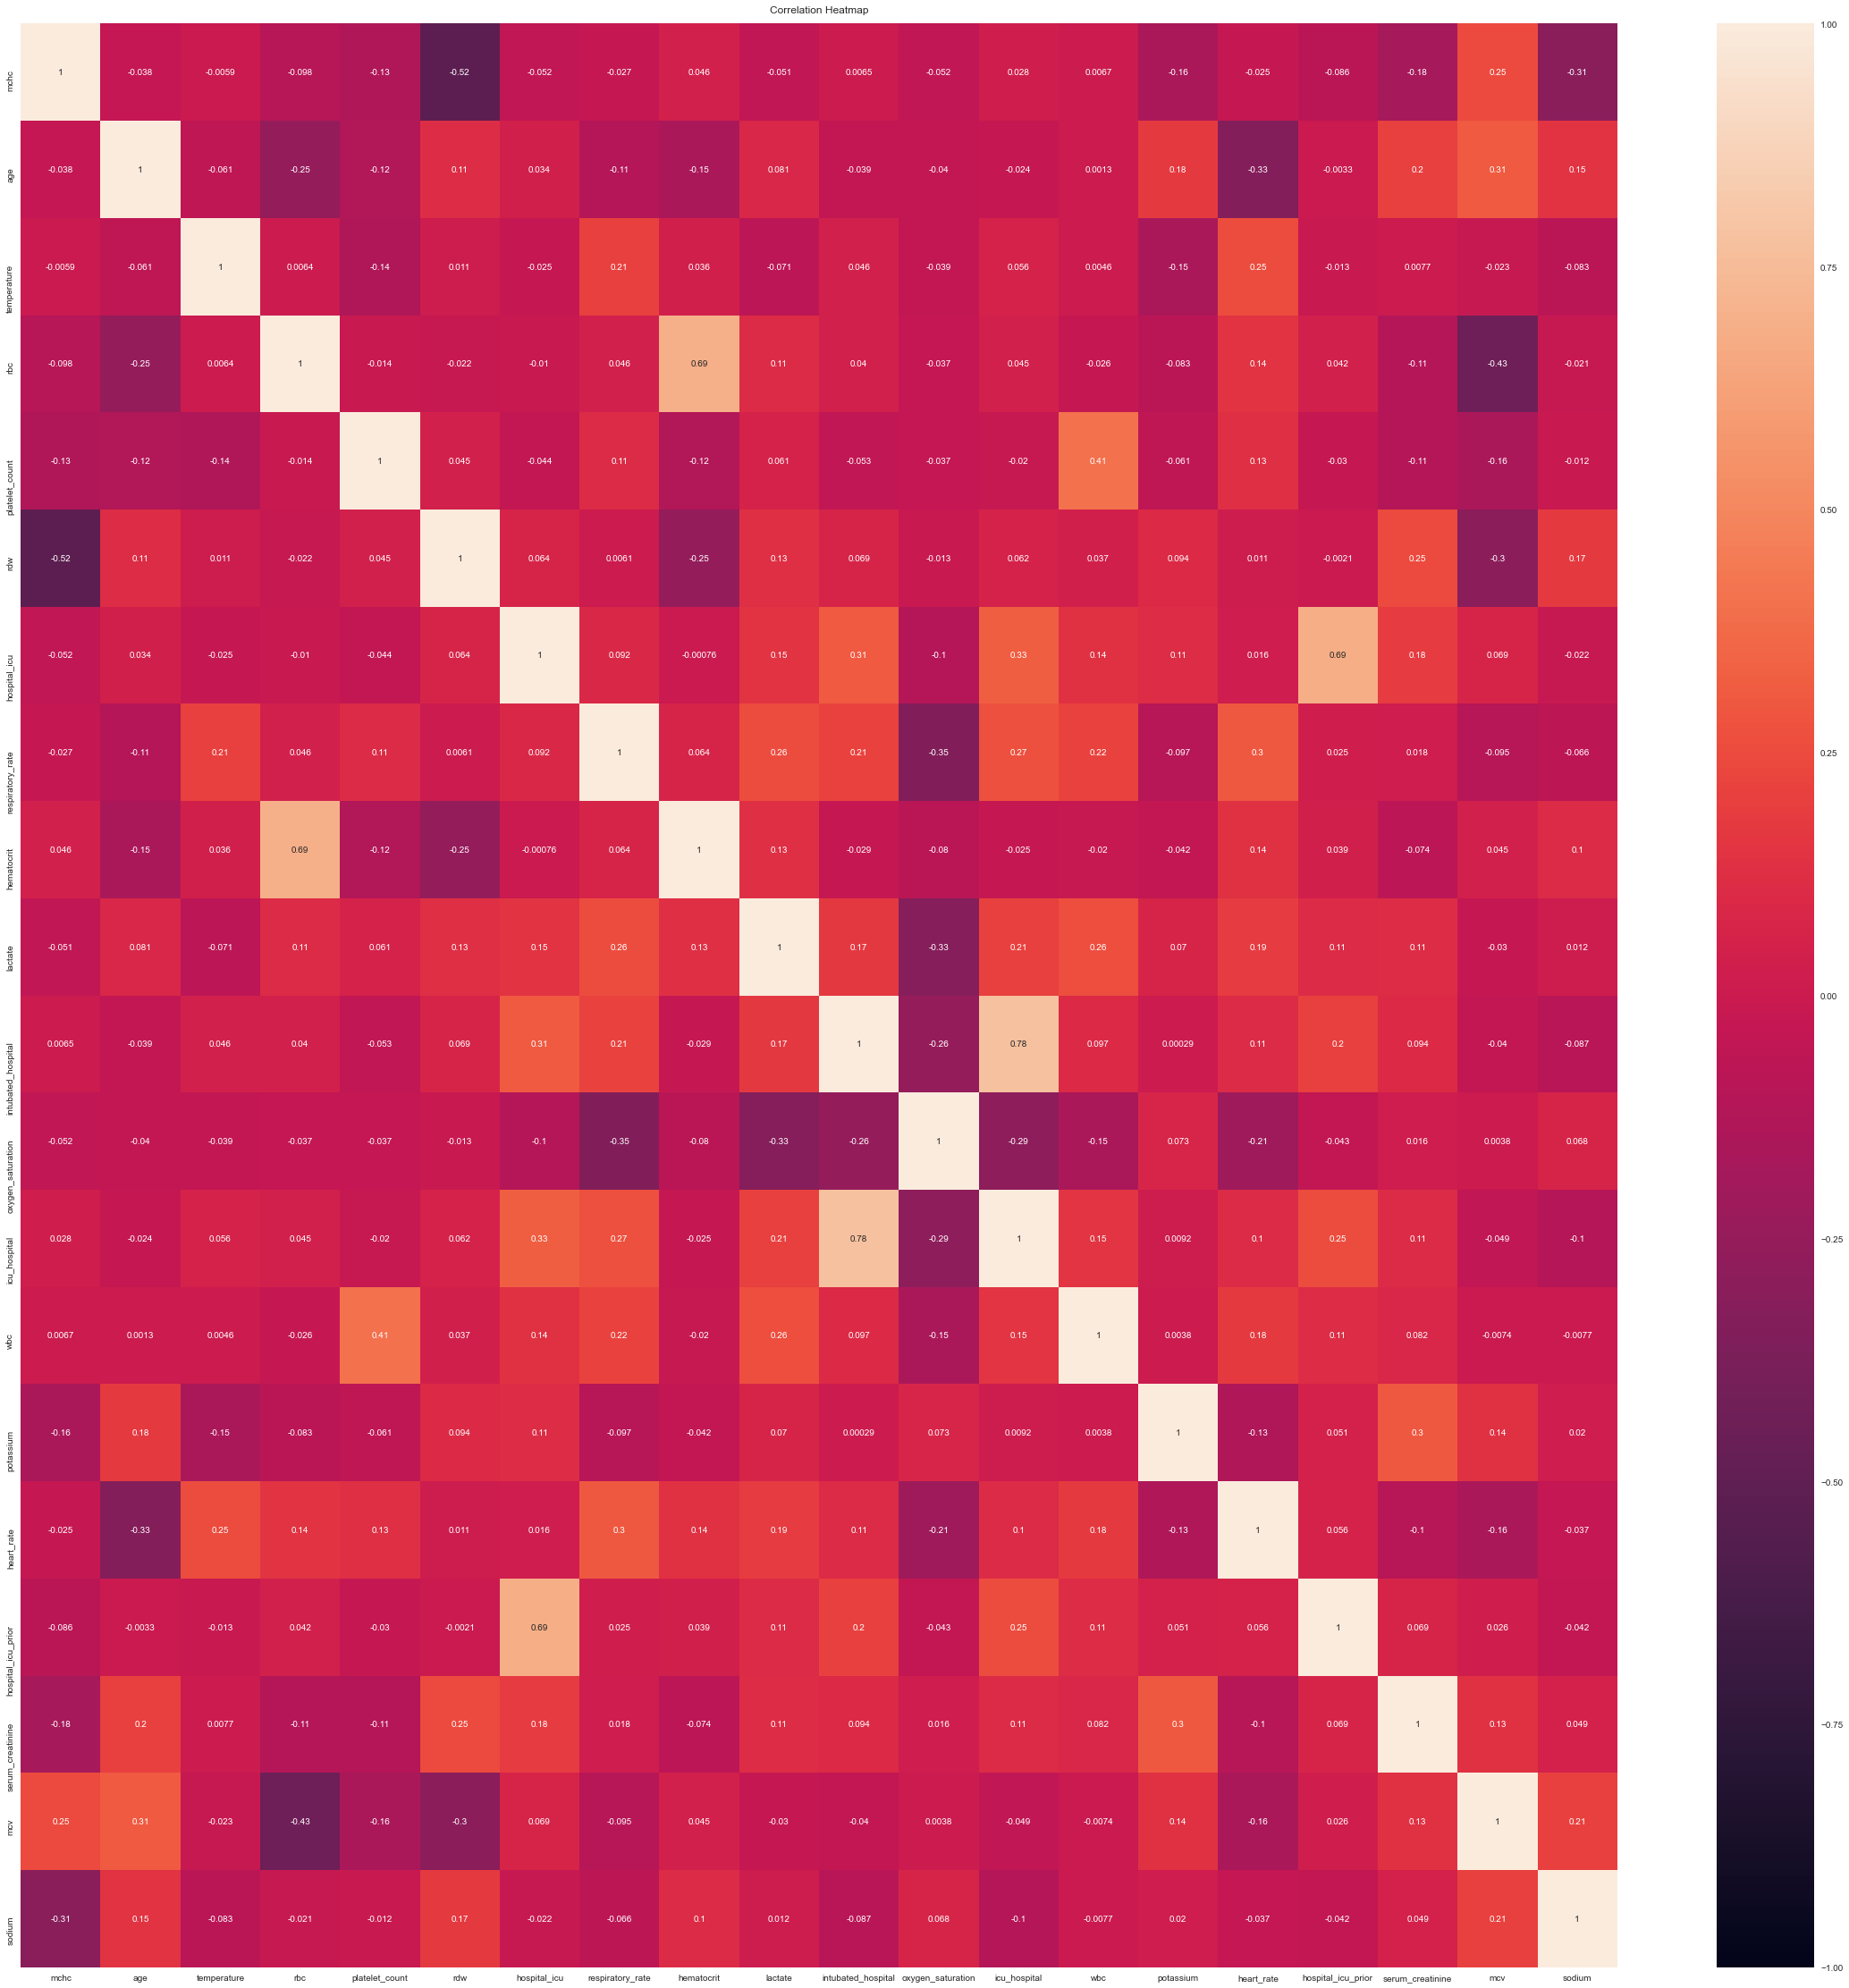

In [1611]:
# Lets see the corrolation or heat map
corrolation_map(dataset[continues_features])

As it can be seen there are several corrolation that still existing in the mode.

Before implementing furthure, the data must be separated. We only choose features based on information from the training set, and not the entire data set. We should reserve a portion of the entire data set as a test set to assess the feature selection and model's performance. Consequently, the information from the test set cannot be viewed during feature selection and model training.

In [1614]:
# eye also has amany missing values
dataset =dataset.drop('eye',axis =1)

xtr, xte, ytr, yte = train_test_split(dataset.values, target_label, test_size = 0.15, shuffle = True)

In [ ]:
def confusion_matrices(yte,y_pred) :
        print(classification_report(yte,y_pred,target_names=['class 0','class 1']))

# ML task- Binary classifcation (Imbalanced data)

In the ML models, I have developed, SVM, Logistic regression, KNN, Random Forest, Decision Tree, XGBOOST and simple artificial intelligence

I have puted two models in here, the first model is XGBOOST and teh secound is ANN.

Due to the fact that  data is extremely unbalanced, the model may include significant majority-class bias (in our case class 0). In order to prevent this, we shall resample the dataset.
For the evaluation, we cannot rely on the accuracy of the data, as the biiger class has more than 85 percent if the ML model always predicts zero, 85 percent will receive an accuracy. However, the ML model cannot distinguish any members of class1, so precision and recall are more important than accuracy.
Precision equals the number of correctly categorised positive instances (1 in this case) divided by the total number of correctly classified positive examples (1 ) In addition, Recall – Recall, often known as "sensitivity," is the proportion of correctly detected positive.

In [1616]:
from numpy import loadtxt
from xgboost import XGBClassifier
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(xtr,ytr)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_to_onehot=4, max_delta_step=0, max_depth=6,
              max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [1617]:
from numpy import loadtxt
from xgboost import XGBClassifier

y_pred = model.predict(xte)
confusion_matrices(yte,y_pred)

              precision    recall  f1-score   support

     class 0       0.90      0.96      0.93        89
     class 1       0.67      0.47      0.55        17

    accuracy                           0.88       106
   macro avg       0.79      0.71      0.74       106
weighted avg       0.87      0.88      0.87       106



Since the disparity between the majority class and minority class is too high in our dataset, we will also consider oversampling the minority class to produce more data.
To overcome the problem of overfitting, my suggestion is using the Synthetic Minority Oversampling Technique (SMOTE) technique. This approach produces synthetic data based on the similarity of feature space between minority cases that already exist.

In [1633]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(xtr, ytr)
xgb_clf = XGBClassifier()
xgb_clf.fit(xtr, ytr)  
xgb_clf.fit(x_smote, y_smote)
y_pred = xgb_clf.predict(xte)
confusion_matrices(yte,y_pred)

              precision    recall  f1-score   support

     class 0       0.94      0.92      0.93        89
     class 1       0.63      0.71      0.67        17

    accuracy                           0.89       106
   macro avg       0.79      0.81      0.80       106
weighted avg       0.89      0.89      0.89       106



Recall is one of the most significant factors in our problem, as precision is of little value and it is crucial for us to obtain correct findings. As can be seen, the precision of class 1 has been enhanced in this manner.

XGBClassifier wihspecific parameters and cross validation

Another example of k fold cross validation

In [1634]:

params = {
            'objective':'binary:logistic',
            'max_depth': 12,
            'alpha': 4,
            'learning_rate': 0.1,
            'n_estimators':200
        }     
xgb_clf = XGBClassifier(**params)
kfold = KFold(n_splits=10, random_state=5,shuffle=True)
results = cross_val_score(xgb_clf, xtr, ytr, cv=kfold)
print("Accuracy: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

Accuracy: 86.40% (5.61%)


In [1641]:
smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(xtr, ytr)
xgb_clf = XGBClassifier(** params)
xgb_clf.fit(xtr, ytr)  
xgb_clf.fit(x_smote, y_smote)
y_pred = xgb_clf.predict(xte)
confusion_matrices(yte,y_pred)

              precision    recall  f1-score   support

     class 0       0.94      0.94      0.94        89
     class 1       0.71      0.71      0.71        17

    accuracy                           0.91       106
   macro avg       0.82      0.82      0.82       106
weighted avg       0.91      0.91      0.91       106



Text(0, 0.5, 'True Positive Rate')

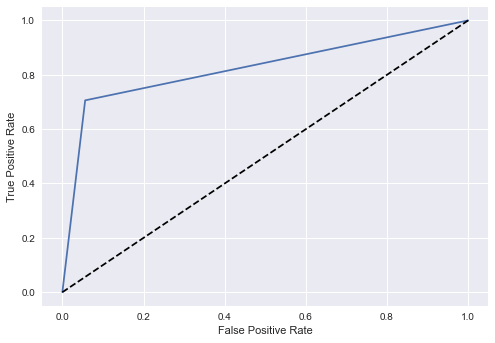

In [1652]:
FPR,TPR, _= roc_curve(yte,y_pred)
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color='black')#diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

Text(52.0, 0.5, 'Actual')

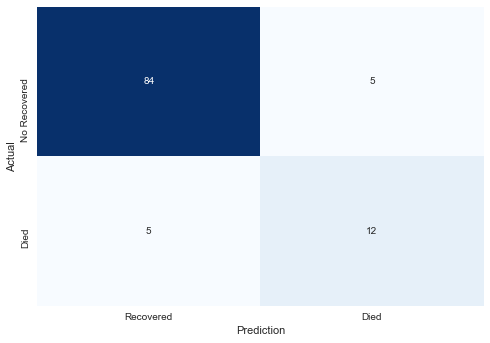

In [1651]:
c_matrix = confusion_matrix(yte,y_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Recovered','Died'], yticklabels=['No Recovered','Died'], cbar= False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

As can be seen, our model accurately predicted the deaths of 12 of 17 people, which is good compare to the number and imbalanced data that we have

By adjustig simple parameters we got a better result in both Percision and Recall.

The k-fold cross-validation technique divides the training dataset into k folds. The initial k-1 folds are used to train a model, whereas the kth fold is utilised as a test set. Each of the folds is had the opportunity to serve as the holdout test set. A total of k models are fitted and assessed, and the model's performance is computed as the weighted average of these runs.

Due to the fact that  data is extremely unbalanced, the model may include significant majority-class bias (in our case class 0). In order to prevent this, we shall resample the dataset.
For the evaluation, we cannot rely on the accuracy of the data, as the biiger class has more than 85 percent if the ML model always predicts zero, 85 percent will receive an accuracy. However, the ML model cannot distinguish any members of class1, so precision and recall are more important than accuracy.
Precision equals the number of correctly categorised positive instances (1 in this case) divided by the total number of correctly classified positive examples (1 ) In addition, Recall – Recall, often known as "sensitivity," is the proportion of correctly detected positive.

In [457]:
def confusion_matrices(yte,y_pred) :
        print(classification_report(yte,y_pred,target_names=['class 0','class 1']))

First encode all the features that are categorical to numbers

Due to the fact that  data is extremely unbalanced, the model may include significant majority-class bias (in our case class 0). In order to prevent this, we shall resample the dataset.

In [1642]:
xtr1 = np.asarray(xtr).astype(np.float32)
ytr1 = np.asarray(ytr).astype(np.float32)
xte, yte = np.asarray(xte).astype(np.float32), np.asarray(yte).astype(np.float32)

In the following stage, three layers of ANN are implemented. Since the available data is limited, a deep model cannot be used.

In [1643]:
from keras.models import Sequential
model = Sequential()
from keras.layers import Dense # Add the first Hidden layer
model.add(Dense(128, activation='relu', input_dim=44))
model.add(Dense(16, activation='relu'))# Add the second hidden layer
model.add(Dense(1, activation='sigmoid'))
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

#Train the model for 200 epochs
model.fit(xtr1,ytr1,epochs=200)

Epoch 1/200
19/19 [==============================] - 1s 3ms/step - loss: 0.4954 - accuracy: 0.8303
Epoch 2/200
19/19 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8303
Epoch 3/200
19/19 [==============================] - 0s 1ms/step - loss: 0.3758 - accuracy: 0.8403
Epoch 4/200
19/19 [==============================] - 0s 1ms/step - loss: 0.3470 - accuracy: 0.8655
Epoch 5/200
19/19 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.8622
Epoch 6/200
19/19 [==============================] - 0s 2ms/step - loss: 0.3142 - accuracy: 0.8739
Epoch 7/200
19/19 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8773
Epoch 8/200
19/19 [==============================] - 0s 1ms/step - loss: 0.2837 - accuracy: 0.8840
Epoch 9/200
19/19 [==============================] - 0s 1ms/step - loss: 0.2747 - accuracy: 0.8874
Epoch 10/200
19/19 [==============================] - 0s 2ms/step - loss: 0.2657 - accuracy: 0.8908
Epoch 11/

In [1644]:
scores = model.evaluate(xtr1,ytr1)
print("Training Accuracy: %.2f%%\n" % (scores[1]*100))
scores = model.evaluate(xte,yte)
print("Testing Accuracy: %.2f%%\n" % (scores[1]*100))

19/19 [==============================] - 0s 1ms/step - loss: 5.3695e-04 - accuracy: 1.0000
Training Accuracy: 100.00%

4/4 [==============================] - 0s 1ms/step - loss: 0.9824 - accuracy: 0.8396
Testing Accuracy: 83.96%



4/4 [==============================] - 0s 1ms/step


Text(52.0, 0.5, 'Actual')

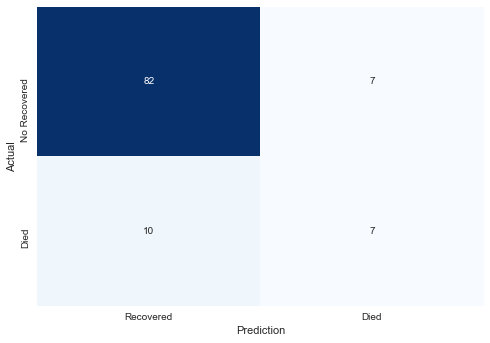

In [1650]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_test_pred = (model.predict(xte) > 0.5).astype("int32")
c_matrix = confusion_matrix(yte,y_test_pred)
ax = sns.heatmap(c_matrix, annot=True, xticklabels=['Recovered','Died'], yticklabels=['No Recovered','Died'], cbar= False, cmap='Blues')
ax.set_xlabel("Prediction")
ax.set_ylabel("Actual")

In [1648]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_test_pred_probs = model.predict(xte)
FPR,TPR, _= roc_curve(yte,y_test_pred_probs)

4/4 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Positive Rate')

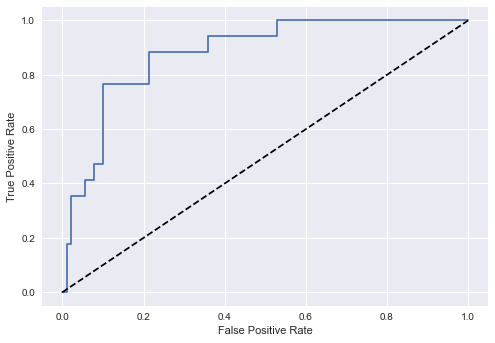

In [1649]:
plt.plot(FPR,TPR)
plt.plot([0,1],[0,1],'--',color='black')#diagonal line

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')